# The first dataset: languages and dialects geo

## Cleaning and filtering of the dataset 

we filter the dataset to only get the languages or dialect which has geographical data

In [1]:
import plotly.graph_objects as go
import pandas as pd


In [2]:
dfhive= pd.read_csv("languages-and-dialects-geo.csv")
rowsToBeDeleted = []
scannedColumns =  ['name', 'macroarea', 'level']
for i in scannedColumns :
    k = 0
    for j in dfhive[i]:
        if j != j:
            rowsToBeDeleted.append(k)
        k += 1
rowsToBeDeleted = list(set(rowsToBeDeleted)) 
"""we convert the list in a set to delete every multiple occurences,
and then we convert it back to a list"""
dfhive.drop(rowsToBeDeleted ,axis=0, inplace = True)
dfhive.reset_index(drop = True, inplace = True)

In [3]:
clean = []
for i in dfhive.columns:
    
    if i not in scannedColumns:
        clean.append(i)
print(clean)
dfhive.drop(clean,axis=1, inplace = True)
dfhive.head()

['glottocode', 'isocodes', 'latitude', 'longitude']


name     level  macroarea
0      Aalawa   dialect  Papunesia
1  Aantantara   dialect  Papunesia
2        Aari  language     Africa
3      Aariya  language    Eurasia
4       Aasax  language     Africa

In [4]:
dfhive.to_csv("lang1.csv", index = False)

In [5]:

df = pd.read_csv("languages-and-dialects-geo.csv")

#we filter every NaN in the latitude longitude and 
rowsToBeDeleted = []
scannedColumns =  ['name', 'latitude', 'longitude']
for i in scannedColumns : 
    k = 0
    for j in df[i]:
        if j != j:
            rowsToBeDeleted.append(k)
        k += 1
rowsToBeDeleted = list(set(rowsToBeDeleted)) 
"""we convert the list in a set to delete every multiple occurences,
and then we convert it back to a list"""
df.drop(rowsToBeDeleted ,axis=0, inplace = True)
df.reset_index(drop = True, inplace = True)

## Data Vizualisation

In [6]:

#we set the color code, depending on if the level, if it is a language or a dialect
colors = []
for i in df['level']:
    if i == "language":
        colors.append (1)
    else :
        colors.append(2)

df['text'] = df['level'] + ':' + df['name'] 
fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = colors,
        ))
fig.update_layout(
        title = 'Languages and dialect repartition across the world',
        
        
        
    )
fig.show()        

## The Hive study

we create the database Language for our study

In [60]:

from pyhive import hive
import matplotlib.pyplot as plt

connection = hive.connect("quickstart.cloudera", username="cloudera")
cursor = connection.cursor()
cursor.execute('DROP DATABASE IF EXISTS LANGUAGE CASCADE')
cursor.execute('CREATE DATABASE LANGUAGE')



we create the first table which cntains data of the first file,languages-and-dialects-geo.csv

In [61]:
cursor.execute("CREATE TABLE IF NOT EXISTS LANGUAGE.lang1 (\
name STRING,\
level STRING,\
macroarea STRING)\
ROW FORMAT DELIMITED \
FIELDS TERMINATED BY ','")



In [62]:
cursor.execute("LOAD DATA LOCAL INPATH '/home/cloudera/Downloads/lang1.csv' OVERWRITE INTO TABLE LANGUAGE.lang1")
cursor.execute('ALTER TABLE LANGUAGE.lang1 set \
TBLPROPERTIES ("skip.header.line.count"="1")')
               
cursor.execute('SET hive.cli.print.header=true') #To print the name of the variables

In [63]:
query = "Select macroarea from LANGUAGE.lang1"
cursor.execute(query)
print(cursor.execute(query))



None


In [64]:
cursor.execute('SELECT level ,COUNT(level) FROM LANGUAGE.lang1 GROUP BY level')
#rows = pd.DataFrame(query, columns=(['level', 'Count level']))
#rows.plot(x='level', kind='bar')
#rows.Quality.mean()
#print('Repartition for white wine by Quality')

In [65]:
cursor.execute('SELECT macroarea, COUNT(level) FROM LANGUAGE.lang1 GROUP BY macroarea')
#rows = pd.DataFrame(query, columns=(['level', 'Count level']))

In [66]:
print(cursor.fetchall())

[('Africa', 5944), ('Australia', 550), ('Eurasia', 5012), ('North America', 1007), ('Papunesia', 4840), ('South America', 1096), ('dialect', 2), ('language', 39)]


# The second dataset, the languoid 

## The general study

###  Cleaning and filtering of the dataset for the general study

In [8]:
import pandas as pd
#import plotly.graph_objects as go

df1 = pd.read_csv("languoid.csv") # dataframe used for the general study
locations  =  pd.read_csv("languoid.csv") # dataframe used for the localisation

we drop the columns containing more than 50 % of nan value for the general study

In [9]:
def nanRate(x):
    k = 0
    for i in x:
        if i !=i :#un nan n'est pas égal à lui meme: 
            k += 1
    rate = k/ len(x)
    return rate


clean = []
for i in df1.columns:
    print(i,nanRate(df1[i]))
    if nanRate(df1[i]) >= 0.5:
        clean.append(i)
print(clean)
df1.drop(clean,axis=1, inplace = True)
df1.head()

bookkeeping 0.0
child_dialect_count 0.0
child_family_count 0.0
child_language_count 0.0
description 1.0
family_pk 0.01850019360667728
father_pk 0.01850019360667728
hid 0.6369659682485049
id 0.0
jsondata 0.0
latitude 0.6649744008948931
level 0.0
longitude 0.6649744008948931
markup_description 1.0
name 0.0
newick 0.0
pk 0.0
status 0.0
['description', 'hid', 'latitude', 'longitude', 'markup_description']


bookkeeping  child_dialect_count  child_family_count  child_language_count  \
0        False                    0                   0                     0   
1        False                    0                   0                     0   
2        False                    0                   0                     2   
3        False                    0                   0                     0   
4         True                    0                   0                     0   

   family_pk  father_pk        id jsondata     level        name  \
0       21.0    20815.0  aala1237       {}   dialect      Aalawa   
1       50.0     5525.0  aant1238       {}   dialect  Aantantara   
2      202.0     1349.0  aari1238       {}    family  Aari-Gayil   
3      202.0     2656.0  aari1239       {}  language        Aari   
4      120.0      120.0  aari1240       {}  language      Aariya   

                                              newick     pk status  
0                                'Aalawa [aala1237]'  21802   safe  
1                            'Aantantara [aant1238]'   8074   safe  
2  ('Aari [aari1239][aiw]-l-','Gayil [gayi1237][g...   2656   safe  
3                          'Aari [aari1239][aiw]-l-'   4424   safe  
4                        'Aariya [aari1240][aay]-l-'   1134   safe

In [10]:
df1.columns
tobekept = ['bookkeeping','level', 'name', 'status']
clean = []
for i in df1.columns:
    if i not in tobekept:
        clean.append(i)
print(clean)
df1.drop(clean,axis=1, inplace = True)
df1.head()

['child_dialect_count', 'child_family_count', 'child_language_count', 'family_pk', 'father_pk', 'id', 'jsondata', 'newick', 'pk']


bookkeeping     level        name status
0        False   dialect      Aalawa   safe
1        False   dialect  Aantantara   safe
2        False    family  Aari-Gayil   safe
3        False  language        Aari   safe
4         True  language      Aariya   safe

In [11]:
rowsToBeDeleted = []
for i in tobekept: 
    k = 0
    for j in df1[i]:
        if j != j:
            rowsToBeDeleted.append(k)
        k += 1
rowsToBeDeleted = list(set(rowsToBeDeleted)) 
"""we convert the list in a set to delete every multiple occurences,
and then we convert it back to a list"""
df1.drop(rowsToBeDeleted ,axis=0, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [12]:
nameToBeDeleted = []
k = 0
for i in df1["name"]:
    notInBoth = True
    for j in df["name"]:
        if i == j:
            notInBoth = False
    if notInBoth:   
        nameToBeDeleted.append(k)
    k += 1
df1.drop(nameToBeDeleted ,axis=0, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [13]:
df1.to_csv("lang2.csv", index = False)

In [15]:
df1.head()

bookkeeping     level         name                 status
0        False  language         Aari                   safe
1        False  language        Aasax                extinct
2        False  language        Abadi                   safe
3        False  language        Abaga  critically endangered
4        False  language  Abai Sungai  definitely endangered

### General study of the dataset 

In [74]:
from pyhive import hive
import matplotlib.pyplot as plt

connection = hive.connect("quickstart.cloudera", username="cloudera")
cursor = connection.cursor()


we create the table for the second file, langoid

In [75]:


cursor.execute("CREATE TABLE IF NOT EXISTS LANGUAGE.lang2 (\
bookkeeping STRING,\
level STRING,\
name STRING,\
status STRING)\
ROW FORMAT DELIMITED \
FIELDS TERMINATED BY ','")



In [76]:
cursor.execute("LOAD DATA LOCAL INPATH '/home/cloudera/Downloads/lang2.csv' OVERWRITE INTO TABLE LANGUAGE.lang2")
cursor.execute('ALTER TABLE LANGUAGE.lang2 set \
TBLPROPERTIES ("skip.header.line.count"="1")')
               
cursor.execute('SET hive.cli.print.header=true')

In [77]:
cursor.execute("SELECT * FROM LANGUAGE.lang2 ")
print(cursor.fetchall())

[('False', 'language', 'Aari', 'safe'), ('False', 'language', 'Aasax', 'extinct'), ('False', 'language', 'Abadi', 'safe'), ('False', 'language', 'Abaga', 'critically endangered'), ('False', 'language', 'Abai Sungai', 'definitely endangered'), ('False', 'language', 'Abanyom', 'safe'), ('False', 'language', 'Mungbam', 'safe'), ('False', 'language', 'Abau', 'safe'), ('False', 'language', 'Abaza', 'definitely endangered'), ('False', 'language', 'Abé', 'safe'), ('False', 'language', 'Abenlen Ayta', 'safe'), ('False', 'language', 'Abidji', 'safe'), ('False', 'language', 'Abinomn', 'safe'), ('False', 'language', 'Abipon', 'extinct'), ('False', 'language', 'Aewa', 'extinct'), ('False', 'language', 'Abkhazian', 'vulnerable'), ('False', 'language', 'Abom', 'safe'), ('False', 'language', 'Abon', 'safe'), ('False', 'language', 'Abron', 'safe'), ('False', 'language', 'Abua', 'safe'), ('False', 'language', 'Abui', 'safe'), ('False', 'language', 'Abun', 'safe'), ('False', 'language', 'Abure', 'safe')

In [87]:
cursor.execute("SELECT  p.name, COUNT(p.name) FROM LANGUAGE.lang1 AS o JOIN LANGUAGE.lang2 AS p ON (o.name=p.name) \
WHERE p.status='safe' AND p.level='language' GROUP BY o.macroarea,p.name")

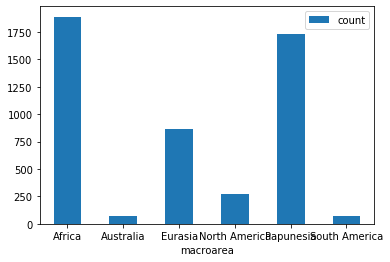

In [95]:
import matplotlib.pyplot as plt

cursor.execute("SELECT  o.macroarea, COUNT(p.name) FROM LANGUAGE.lang1 AS o JOIN LANGUAGE.lang2 AS p ON (o.name=p.name) \
WHERE p.status='safe' AND p.level='language' GROUP BY o.macroarea")
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['macroarea', 'count']))

rows.plot.bar(x="macroarea",y="count",rot=0)
#rows.head()
#plt.bar(rows[0],rows[1])
#rows.Quality.mean()

## Geographical vizualisation

### Cleaning and filtering of the dataset for geo vizualisation

In [7]:
locations  =  pd.read_csv("languoid.csv") # dataframe used for the localisations 

#### first impression of the localisation part before the cleaning 

How much of the geo data are we lacking?

In [8]:
#there are way more dialect than languages
dial = 0
lang = 0
fam = 0
for i in locations["level"]:
    if i == "language":
        lang += 1
    if i == "dialect":
        dial +=1
    if i == "family":
        fam += 1
print("there are:\n" )
print(dial, "dialects")
print(lang, "languages")
print(fam, "family languages")
#print(fam + lang + dial, len (df["level"]))
#there are three types of languages 

there are:

10531 dialects
8444 languages
4268 family languages


In [9]:
row = 0 #number of the current line studied
geod = 0 #number of the missing dialect geographical data
geol = 0 #number of the missing language geographical data
geof = 0 #number of the missing  family language geographical data
for i in locations["latitude"]:
    if i != i :
        if locations["level"][row] == "language":
            geol += 1
        elif locations["level"][row] == "dialect" :  
            geod += 1
        else :
            geof += 1
    row += 1
print ( "we have", 1 - geol/lang, "% of the geographical data for languages")
print ( "we have", 1 - geod/dial, "% of the geographical data for dialects")
print ( "we have", 1 - geof/fam, "% of the geographical data for family")

we have 0.9095215537659876 % of the geographical data for languages
we have 0.009020985661380654 % of the geographical data for dialects
we have 0.002811621368322359 % of the geographical data for family


We are definetly lacking geographical data for family and dialects (less than 0.01% for both)

Hence we will focus one the languages data because  have a revelant amount of geographical on those

#### Cleaning and filtering

In [10]:
rowsToBeDeleted = []
scannedColumns =  ['name', 'latitude', 'longitude']
for i in scannedColumns : 
    k = 0
    for j in locations[i]:
        if j != j or locations["level"][k] == "dialect" or locations["level"][k] == "family": #if we don't have geographical data or if it is the dialect we won't represent it
            rowsToBeDeleted.append(k)
        k += 1
rowsToBeDeleted = list(set(rowsToBeDeleted)) 
"""we convert the list in a set to delete every multiple occurences,
and then we convert it back to a list"""
locations.drop(rowsToBeDeleted ,axis=0, inplace = True)
locations.reset_index(drop = True, inplace = True)

k = 0
l = []
for i in locations["status"]:
    if i != 'safe' and i!='vulnerable' and i!='definitely endangered' and i != 'critically endangered' and i != 'extinct':
        l.append(k)
    k += 1
locations.drop(l ,axis=0, inplace = True)
locations.reset_index(drop = True, inplace = True)
       

## Vizualisation

### We want to vizualise all these features on a map 

We set a color code depending on the status of the language

In [11]:

colors = []

for i in locations['status']:
    if i == 'safe':
        colors.append('green')
        
    if i == 'vulnerable':
        colors.append('yellow')
      
    if i == 'definitely endangered':
        colors.append('orange')
        
    if i == 'critically endangered':
        colors.append('red')   
        
    if i == 'extinct':
        colors.append('black')

In [12]:
locations['text'] = locations['level'] + ':' + locations['name'] 
fig = go.Figure(data=go.Scattergeo(
        lon = locations['longitude'],
        lat = locations['latitude'],
        text = locations['text'],
        mode = 'markers',
        marker_color = colors,
        
        )) 

fig.update_layout(
        title = 'Languages repartition across the world',
        
        
        
    )

fig.show()

which give on a "fancier" map 

In [13]:
import plotly.express as px

fig = px.scatter_mapbox( lat=locations['latitude'], lon=locations['longitude'], text = locations['text'],color=locations['status'],zoom = 0.5, height=500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
       
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# The Phylogenetic tree of the languages 

### We now want to see the relationship between each languages 

## Cleaning and filtering of the dataset for the newick data

In [14]:
import pandas as pd
import plotly.graph_objects as go
nwickToBe =  pd.read_csv("languoid.csv")  # dataframe used to isolate the newick data with or without geo data
newnwickToBe =  pd.read_csv("languoid.csv")  # dataframe used to isolate the newick data with  geo data

In [24]:
k = 0 
clean = []
for i in newnwickToBe["level"]:
    if i != "language": 
        clean.append(k)
    if newnwickToBe["latitude"][k] != nwickToBe["latitude"][k] : #if the latitude is Nan
        clean.append(k)
    k += 1
clean = list(set(clean))
print(clean)
newnwickToBe.drop(clean,axis=0,inplace = True)
newnwickToBe.reset_index(drop = True, inplace = True)

[0, 1, 2, 4, 6, 7, 8, 9, 10, 13, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 29, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43, 47, 48, 49, 51, 52, 55, 56, 57, 58, 60, 61, 62, 64, 66, 67, 69, 70, 71, 74, 76, 77, 79, 80, 83, 87, 88, 89, 92, 93, 97, 98, 100, 102, 107, 108, 111, 112, 114, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 136, 139, 140, 141, 142, 143, 145, 147, 148, 150, 151, 152, 155, 156, 157, 160, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 195, 197, 198, 199, 200, 201, 203, 207, 209, 211, 212, 213, 215, 216, 217, 219, 220, 221, 225, 226, 227, 228, 230, 233, 234, 235, 237, 240, 241, 242, 243, 246, 248, 250, 252, 254, 255, 256, 257, 259, 261, 264, 265, 267, 270, 271, 272, 274, 277, 279, 280, 281, 283, 284, 285, 286, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 299, 302, 304, 305, 306, 307, 308, 309, 314, 320, 321, 322, 323, 325, 327, 328, 334, 335, 337, 338, 339, 

In [25]:
l = []
for i in newnwickToBe.columns : 
    if i != "newick":
        l.append(i)
newnwickToBe.drop(l,axis=1, inplace = True)

l = []
for i in nwickToBe.columns : 
    if i != "newick":
        l.append(i)
nwickToBe.drop(l,axis=1, inplace = True)

In [26]:
newnwickToBe.to_csv('newnewick.csv', index = False)
nwickToBe.to_csv('newick.csv', index = False)

## Phylogenetical tree vizualisation

In [27]:
#import
import pandas as pd 
df=pd.read_csv("newick.csv")
df.head(20)



newick
0                                 'Aalawa [aala1237]'
1                             'Aantantara [aant1238]'
2   ('Aari [aari1239][aiw]-l-','Gayil [gayi1237][g...
3                           'Aari [aari1239][aiw]-l-'
4                         'Aariya [aari1240][aay]-l-'
5                          'Aasax [aasa1238][aas]-l-'
6                              'Aatasaara [aata1238]'
7                                    'Aba [abaa1238]'
8                                 'Ababda [abab1239]'
9   (('Bafwandaka [bafw1242]','Bakundumu [baku1261...
10                               'Abadzex [abad1240]'
11                         'Abadi [abad1241][kbt]-l-'
12                         'Abaga [abag1245][abg]-l-'
13                                  'Abai [abai1239]'
14                   'Abai Sungai [abai1240][abf]-l-'
15             'Abai Tubu-Abai Sembuak [abai1241]-l-'
16                                  'Abak [abak1242]'
17                                 'Abaka [abak1243]'
18                              'Abaletti [abal1238]'
19                                  'Abam [abam1239]'

In [28]:
#find which tree is longue enought to be intresting and with no code pb
l=[]
v=[]
l_pb_parenth=[182,432,434,458,688,689,811,812,813,835,866]
for i in range(0,1000):
    txt=df.loc[i, 'newick']
    
    if(len(txt)>1000):
        if(i not in l_pb_parenth) :
            l.append(txt)
            v.append(i)

print(v)

[9, 143, 363, 459, 473, 597, 671, 710, 842]


In [39]:
import copy
from io import StringIO
from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny
import matplotlib.pyplot as plt

we create a folder "phylo_tree"to serialize our tree data

In [40]:
for i in range(len(l)):
    path ="./phylo_tree/expl"+str(i)+".dnd"
    fichier = open(path, "w")
    fichier.write(l[i])
    fichier.close()

we checked each tree because we had apparently parenthesis issues, however we did several algorithm to enumerate 
each left and right parenthesis in order to correct the issue but each time their number were even, so here are some of the longest tree we were able to display 

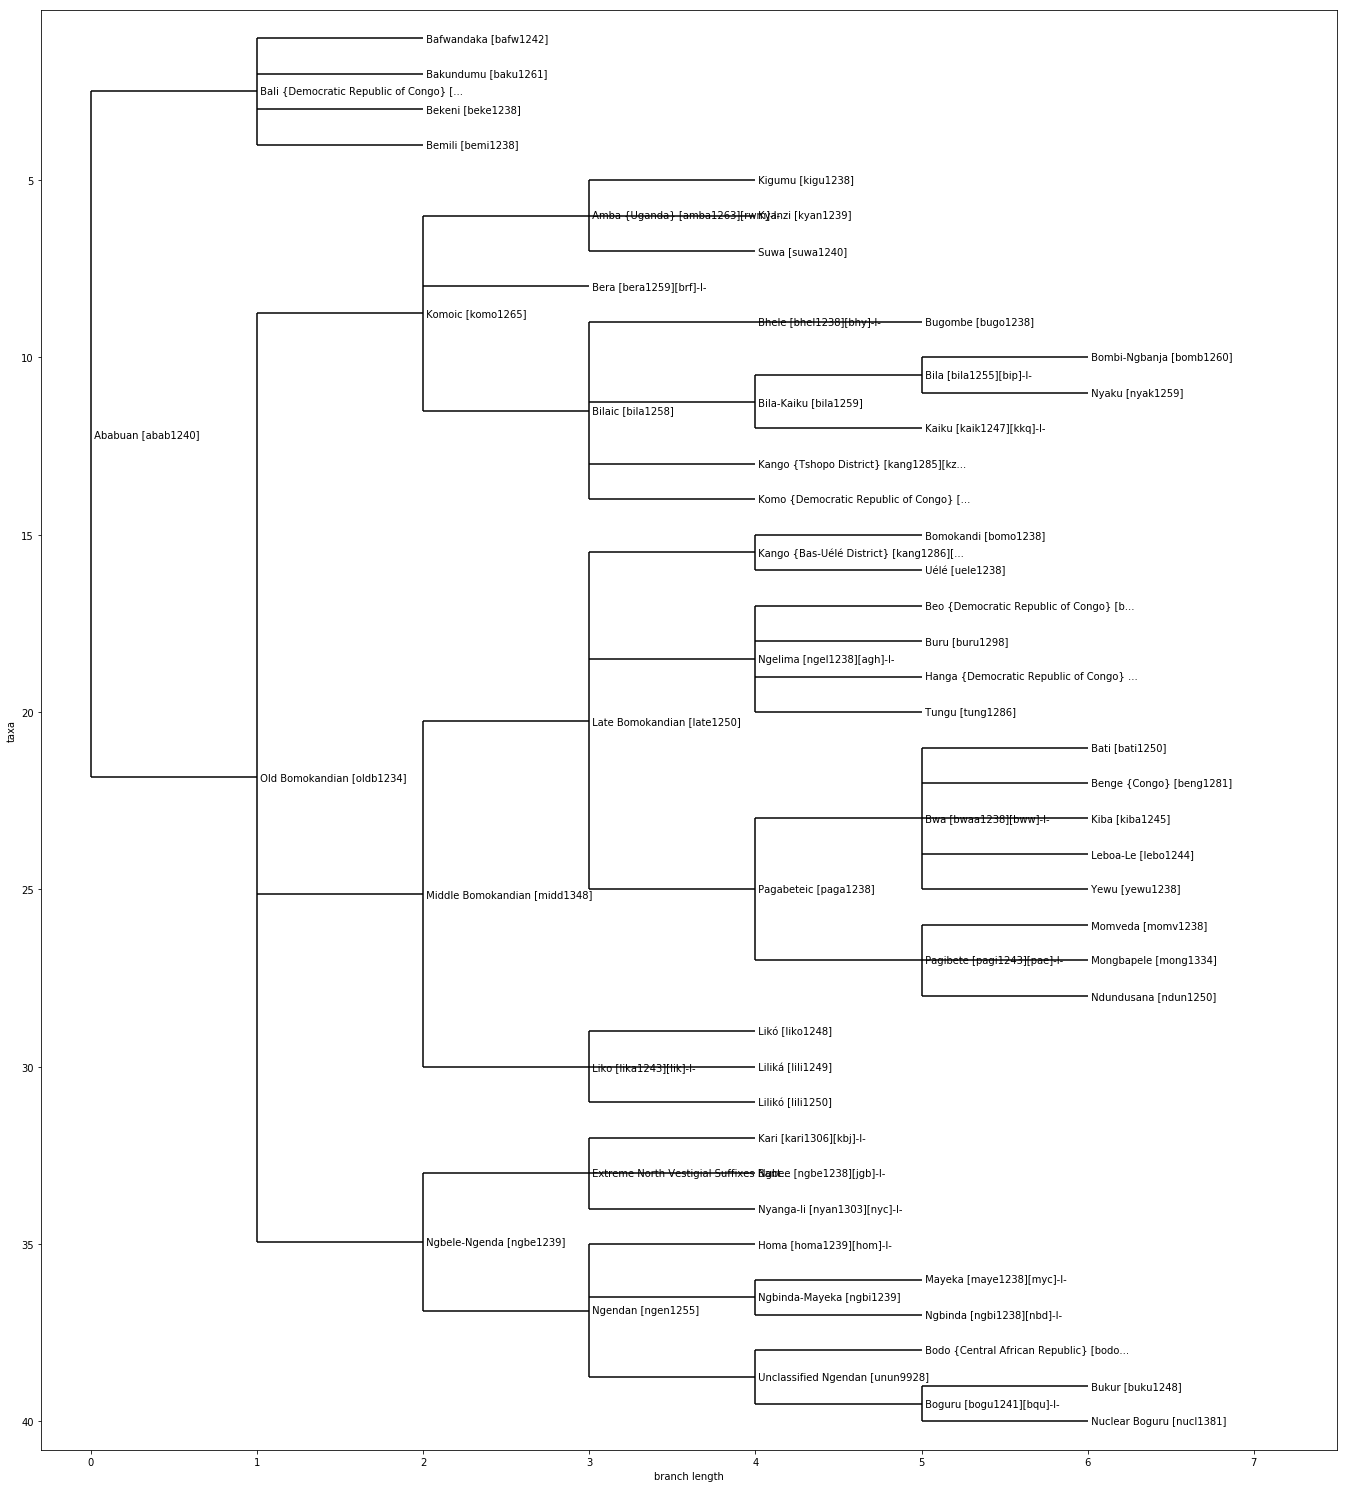

In [41]:
%matplotlib inline
left=3
bottom=5
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

#help(Phylo.draw)

fil="./phylo_tree/expl0.dnd"

tree = Phylo.read("./phylo_tree/expl0.dnd", "newick")


tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"
mrca = tree.common_ancestor("Bafwandaka [bafw1242]", "Bakundumu [baku1261]","Bekeni [beke1238]","Bemili [bemi1238]")
mrca.color = "salmon"

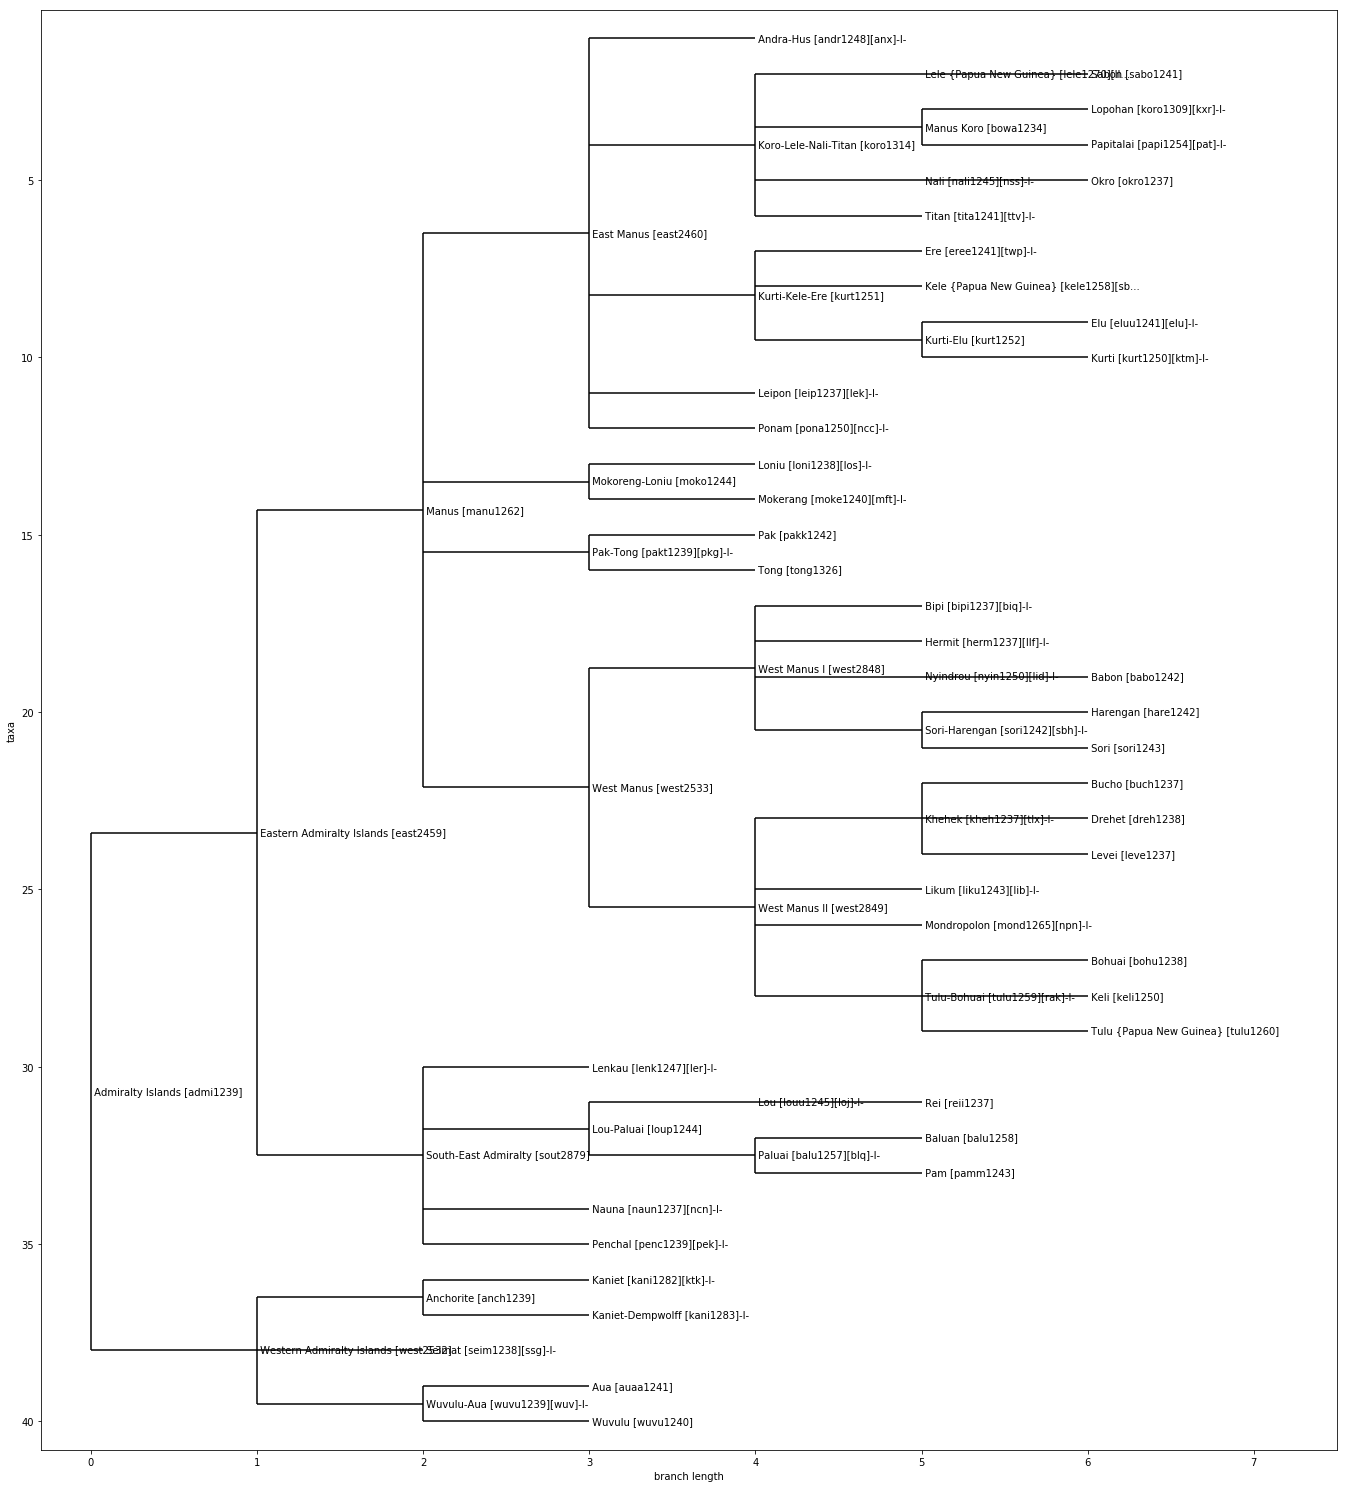

In [42]:
left=3
bottom=8
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')


fil="./phylo_tree/expl1.dnd"

tree = Phylo.read(fil, "newick")


tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

#tree.clade[0, 1].color = "blue"

#Phylo.draw_ascii(tree)

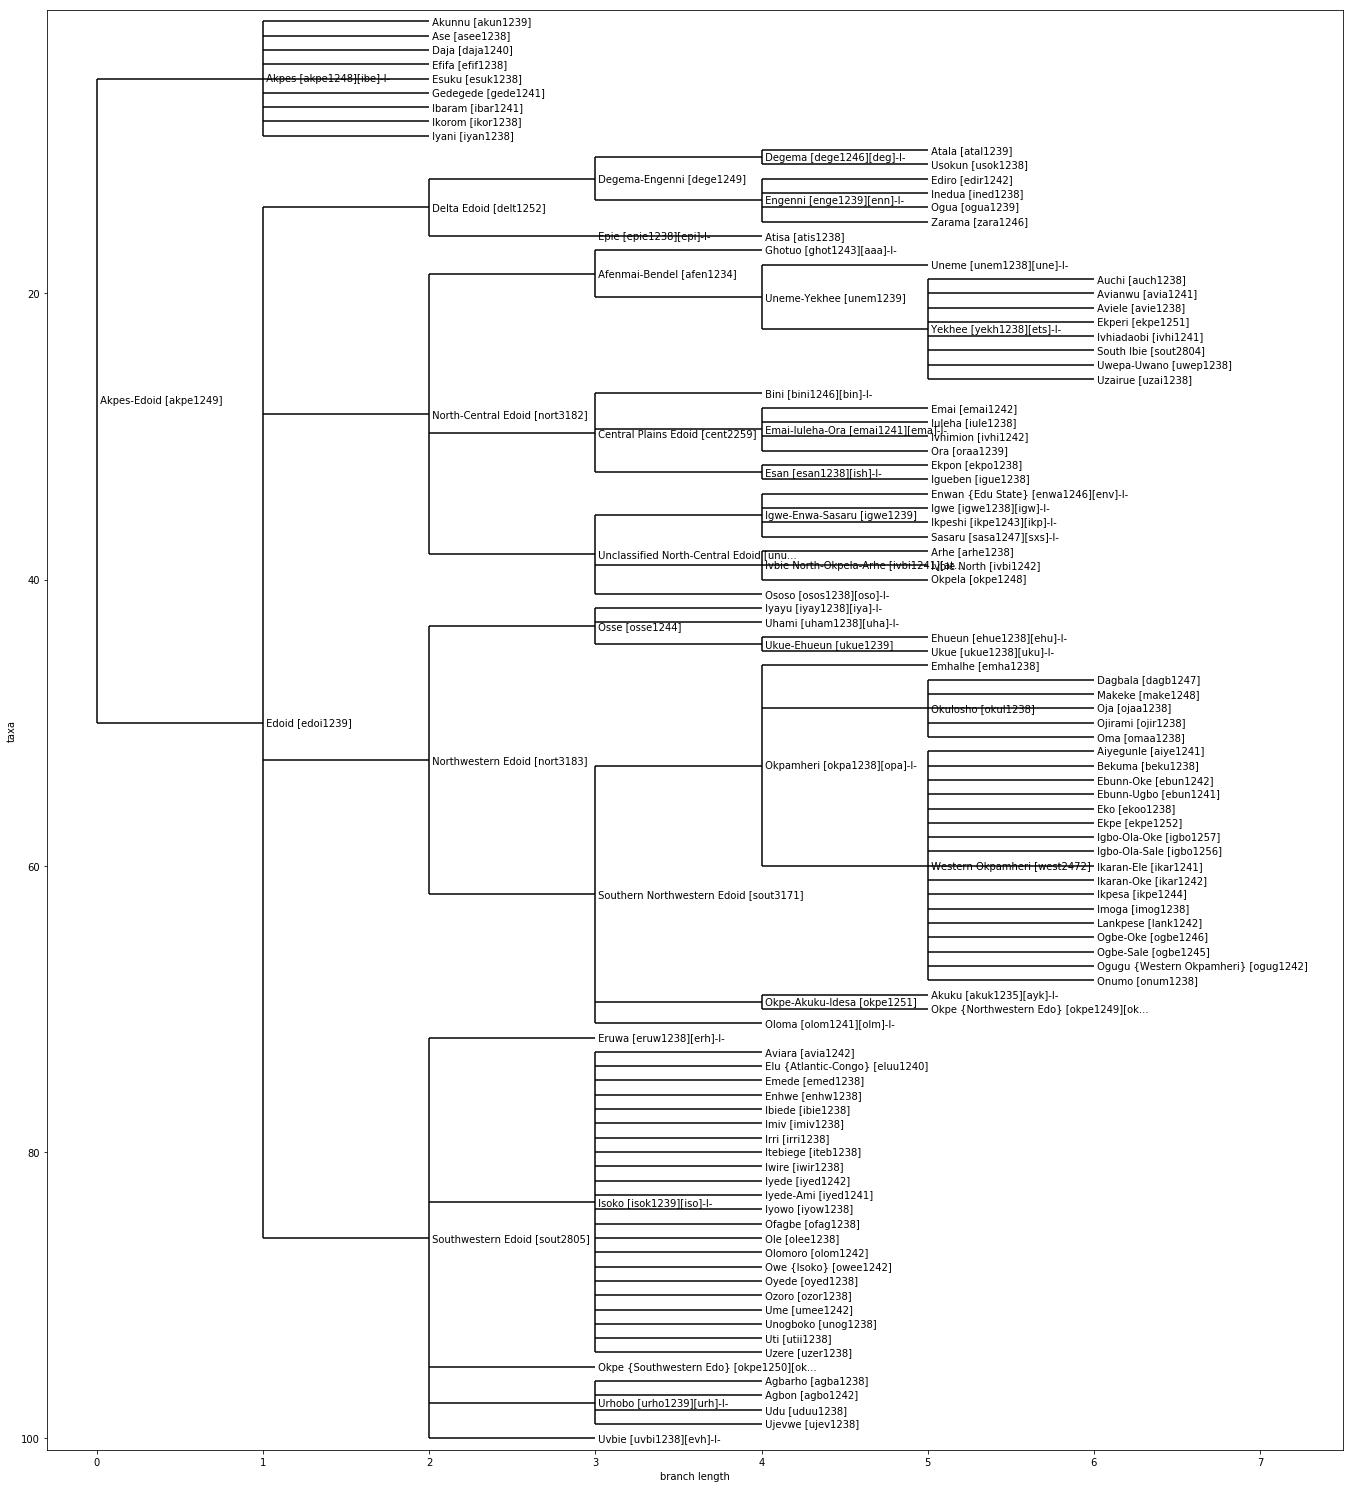

In [45]:
left=5
bottom=8
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')


fil="./phylo_tree/expl2.dnd"

tree = Phylo.read(fil, "newick")


tree.rooted = True

Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

#tree.clade[0, 1].color = "blue"

#Phylo.draw_ascii(tree)

We now try to representent with languages which have geographical data in order to study the geographical 
evolution however we did not succeed becaus each tree contained data without geo data for each languages 

In [46]:
import pandas as pd 
df2=pd.read_csv("newnewick.csv")
l=[]
v=[]
l_pb_parenth=[182,432,434,458,688,689,811,812,813,835,866]
for i in range(0,1000):
    txt=df2.loc[i, 'newick']
    
    if(len(txt)>500):
            l.append(txt)
            v.append(i)
        
print(v)

[381, 787]


In [47]:
for i in range(len(l)):
    path ="./phylo_tree/expl"+str(i)+".dnd"
    fichier = open(path, "w")
    fichier.write(l[i])
    fichier.close()

./phylo_treeArea/Eurasia.dnd
./phylo_treeArea/South America.dnd
./phylo_treeArea/North America.dnd
./phylo_treeArea/Australia.dnd
./phylo_treeArea/Africa.dnd
./phylo_treeArea/Papunesia.dnd


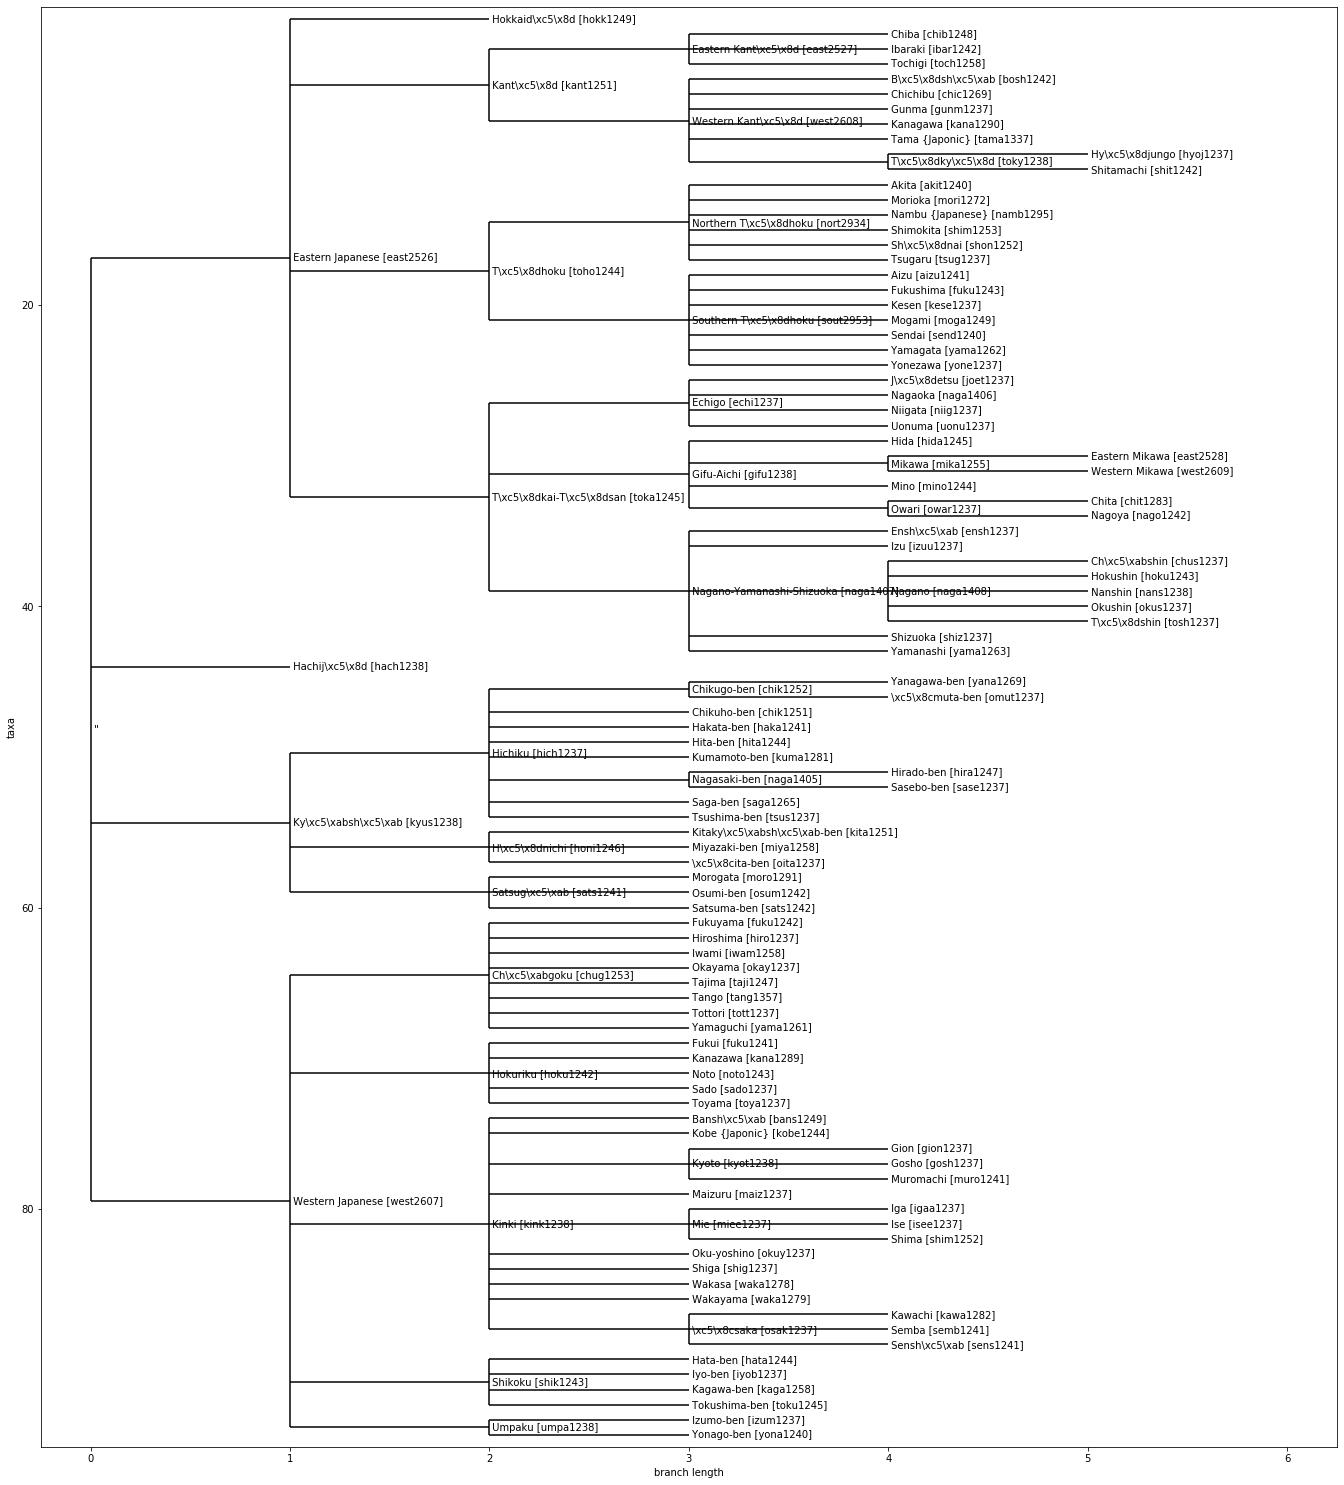

In [41]:
import copy
from io import StringIO


from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny
import matplotlib.pyplot as plt

%matplotlib inline
left=3
bottom=5
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

for i in range(0,6):
    fil="./phylo_treeArea/"+area[i]+".dnd"
    print(fil)

pat="./phylo_treeArea/Eurasia.dnd"
tree = Phylo.read(pat, "newick")

tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"



./phylo_treeArea/South America.dnd


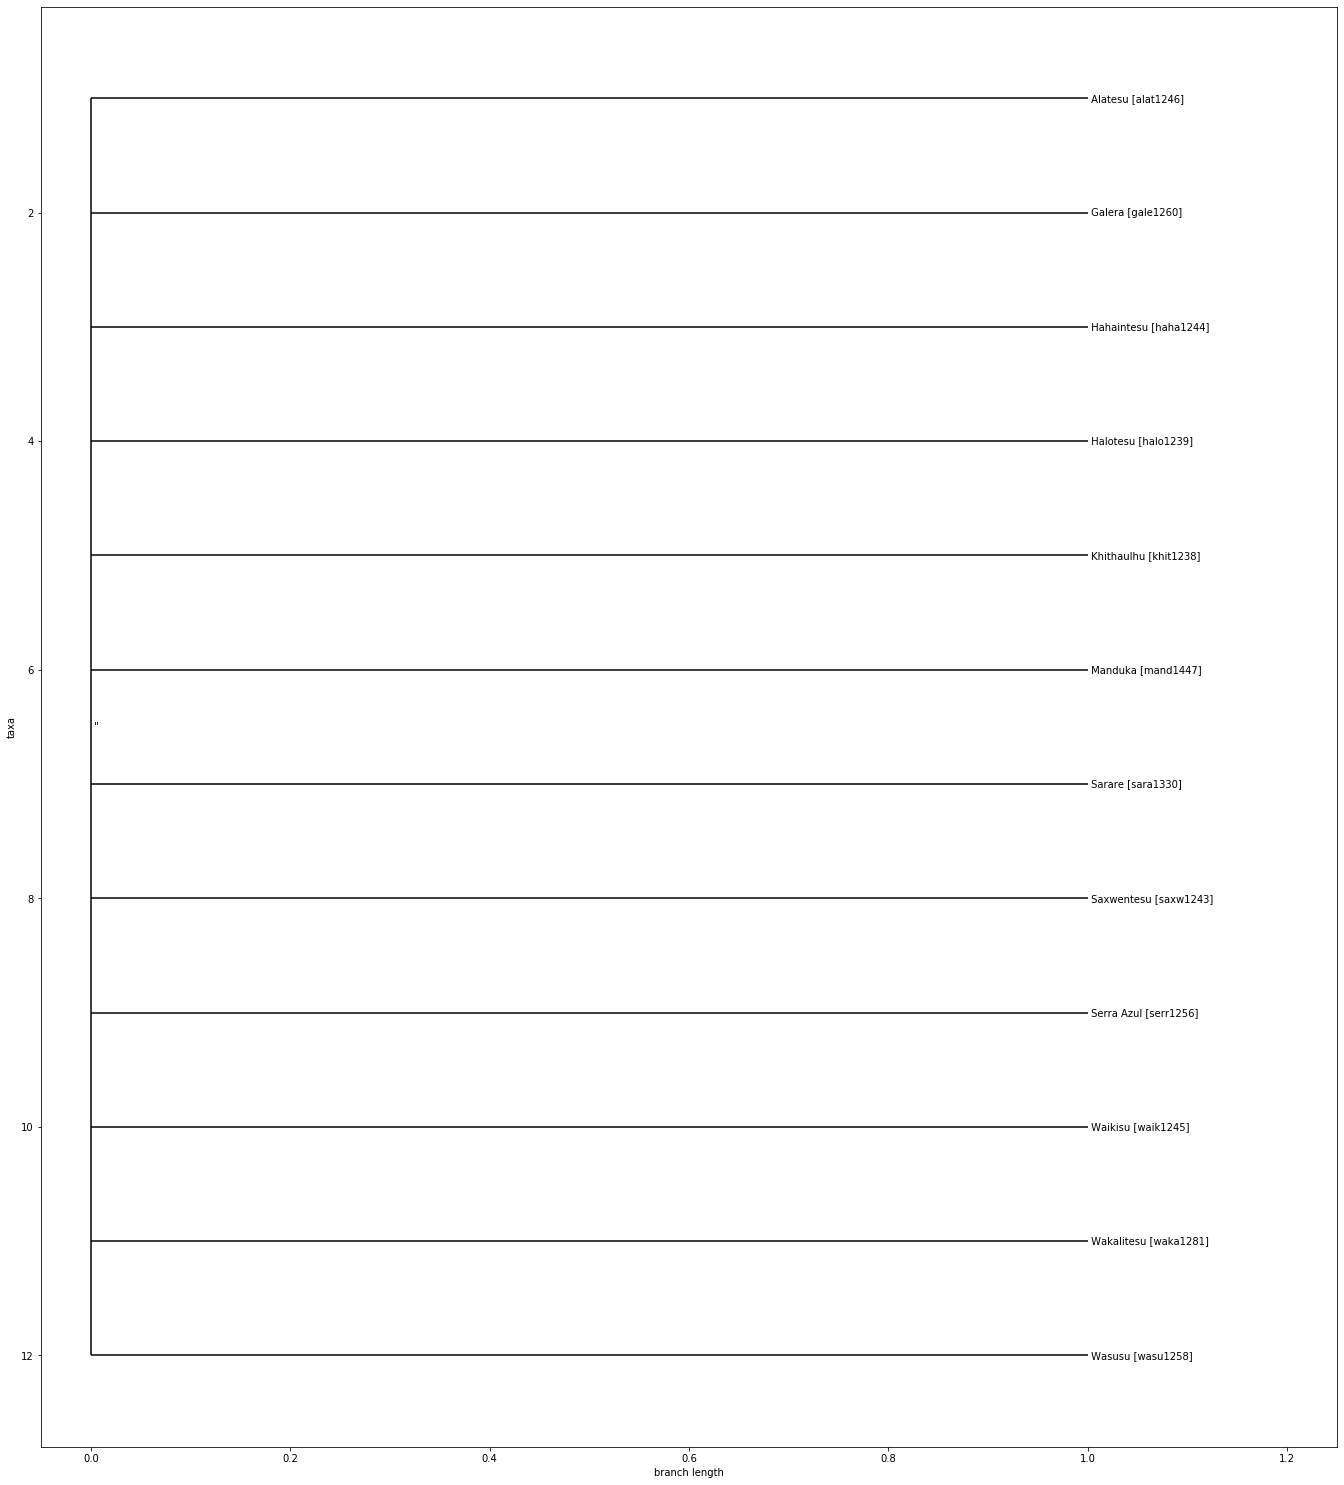

In [42]:
%matplotlib inline
left=3
bottom=5
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

for i in range(1,2):
    fil="./phylo_treeArea/"+area[i]+".dnd"
    print(fil)

pat="./phylo_treeArea/South America.dnd"
tree = Phylo.read(pat, "newick")

tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"



./phylo_treeArea/North America.dnd


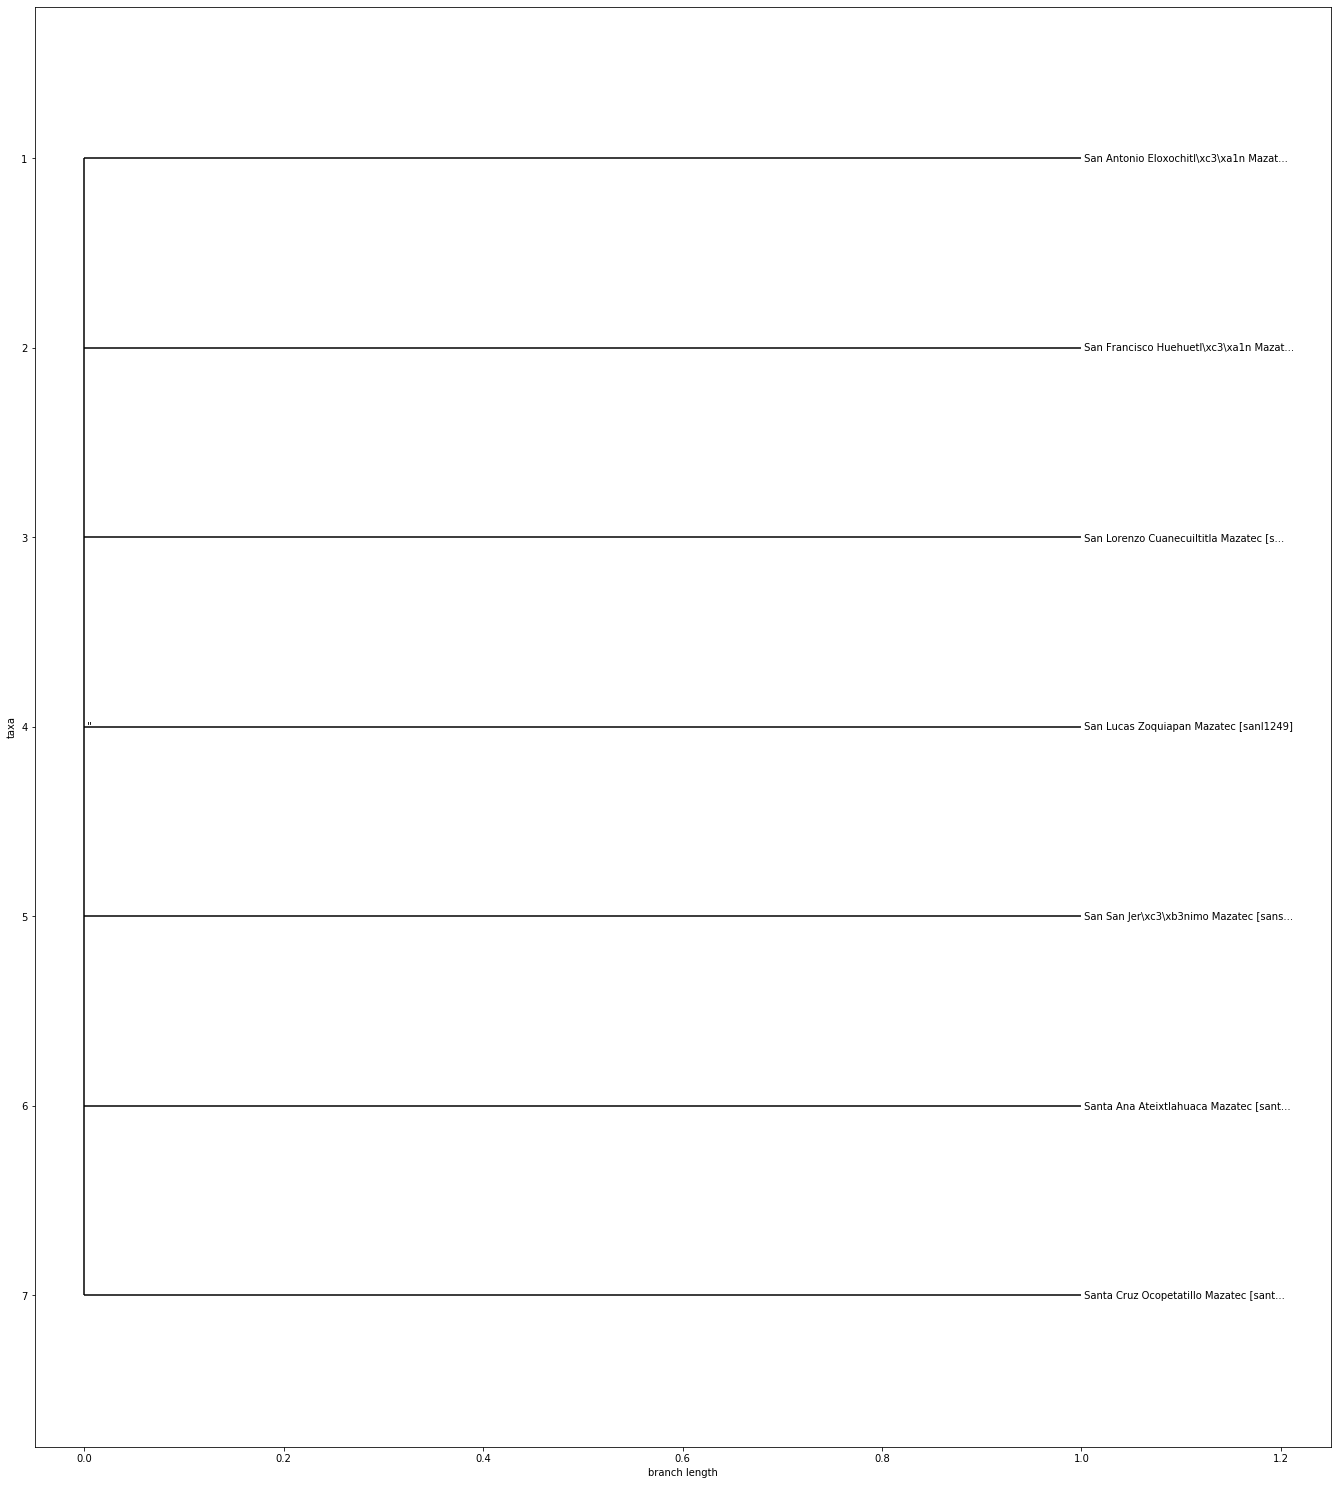

In [45]:
%matplotlib inline
left=3
bottom=5
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

for i in range(2,3):
    fil="./phylo_treeArea/"+area[i]+".dnd"
    print(fil)

pat="./phylo_treeArea/North America.dnd"
tree = Phylo.read(pat, "newick")

tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

./phylo_treeArea/Australia.dnd


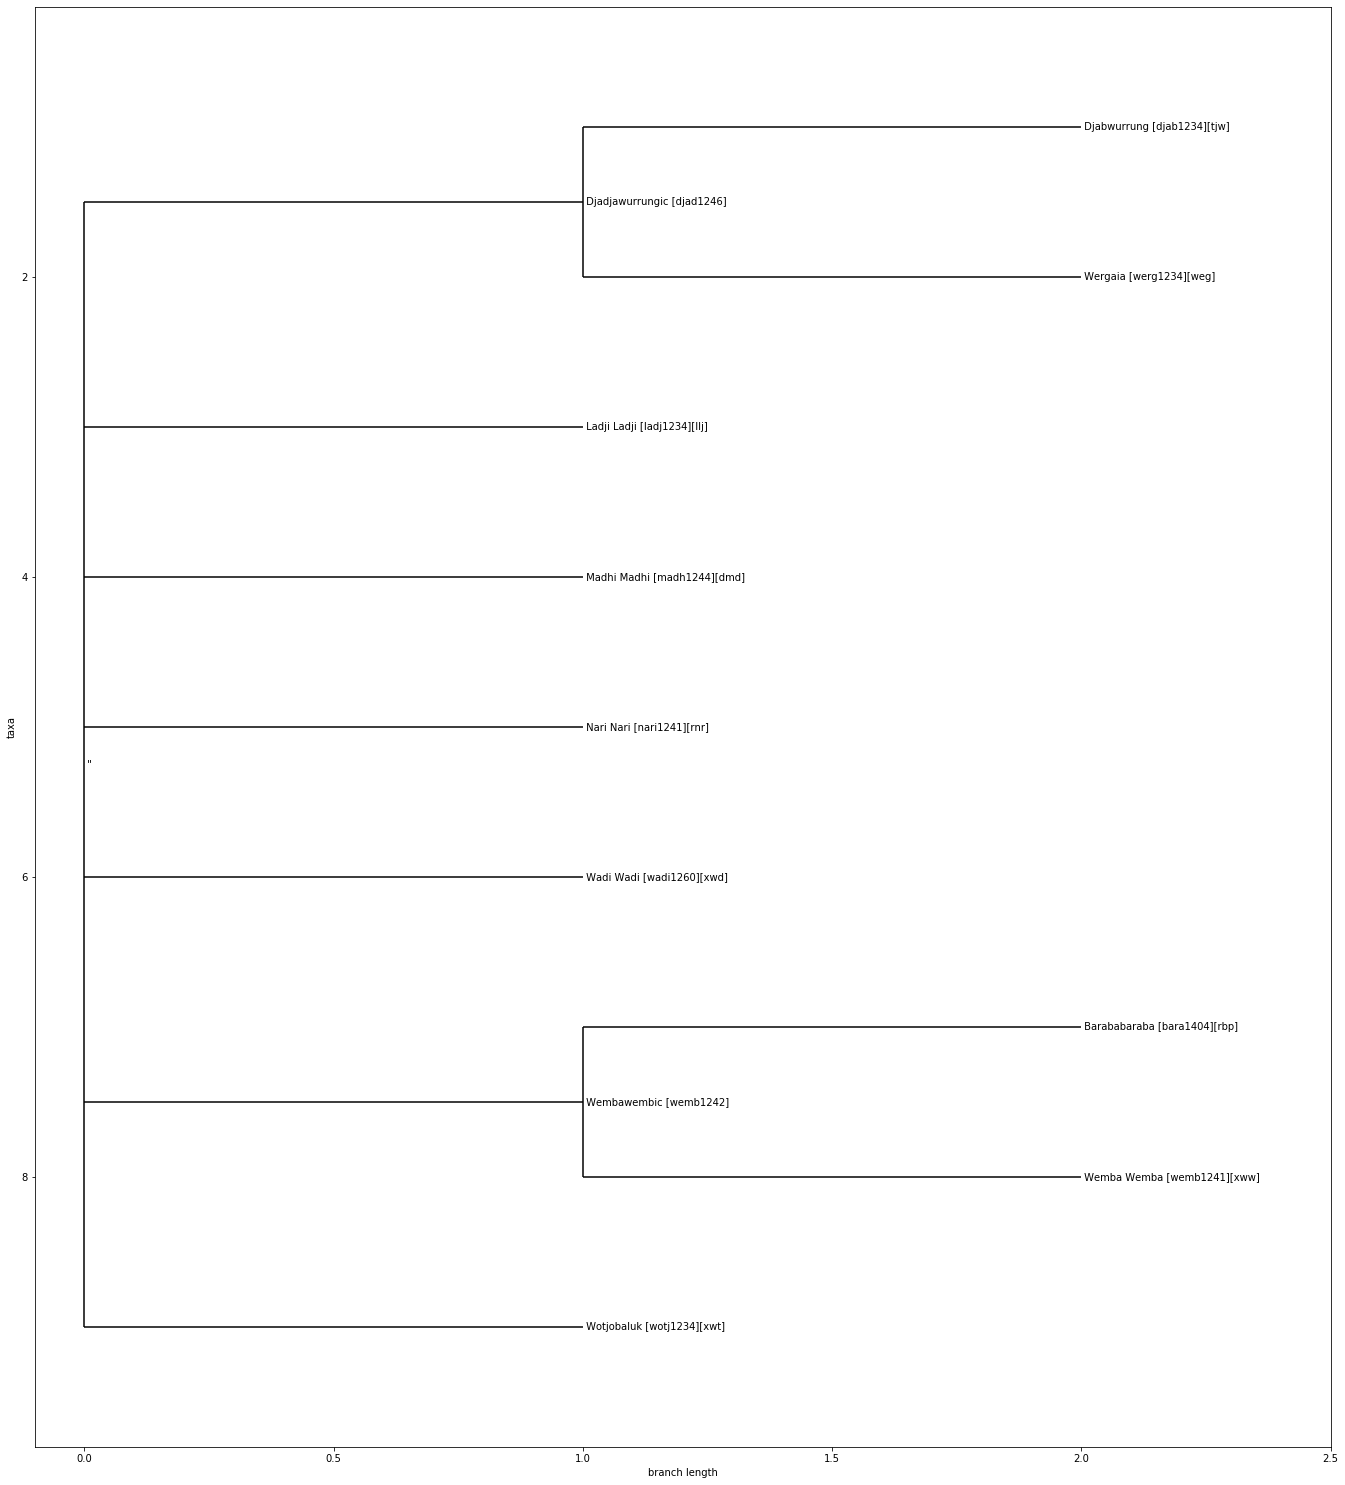

In [46]:
%matplotlib inline
left=3
bottom=5
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

for i in range(3,4):
    fil="./phylo_treeArea/"+area[i]+".dnd"
    print(fil)

pat="./phylo_treeArea/Australia.dnd"
tree = Phylo.read(pat, "newick")

tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

./phylo_treeArea/Africa.dnd


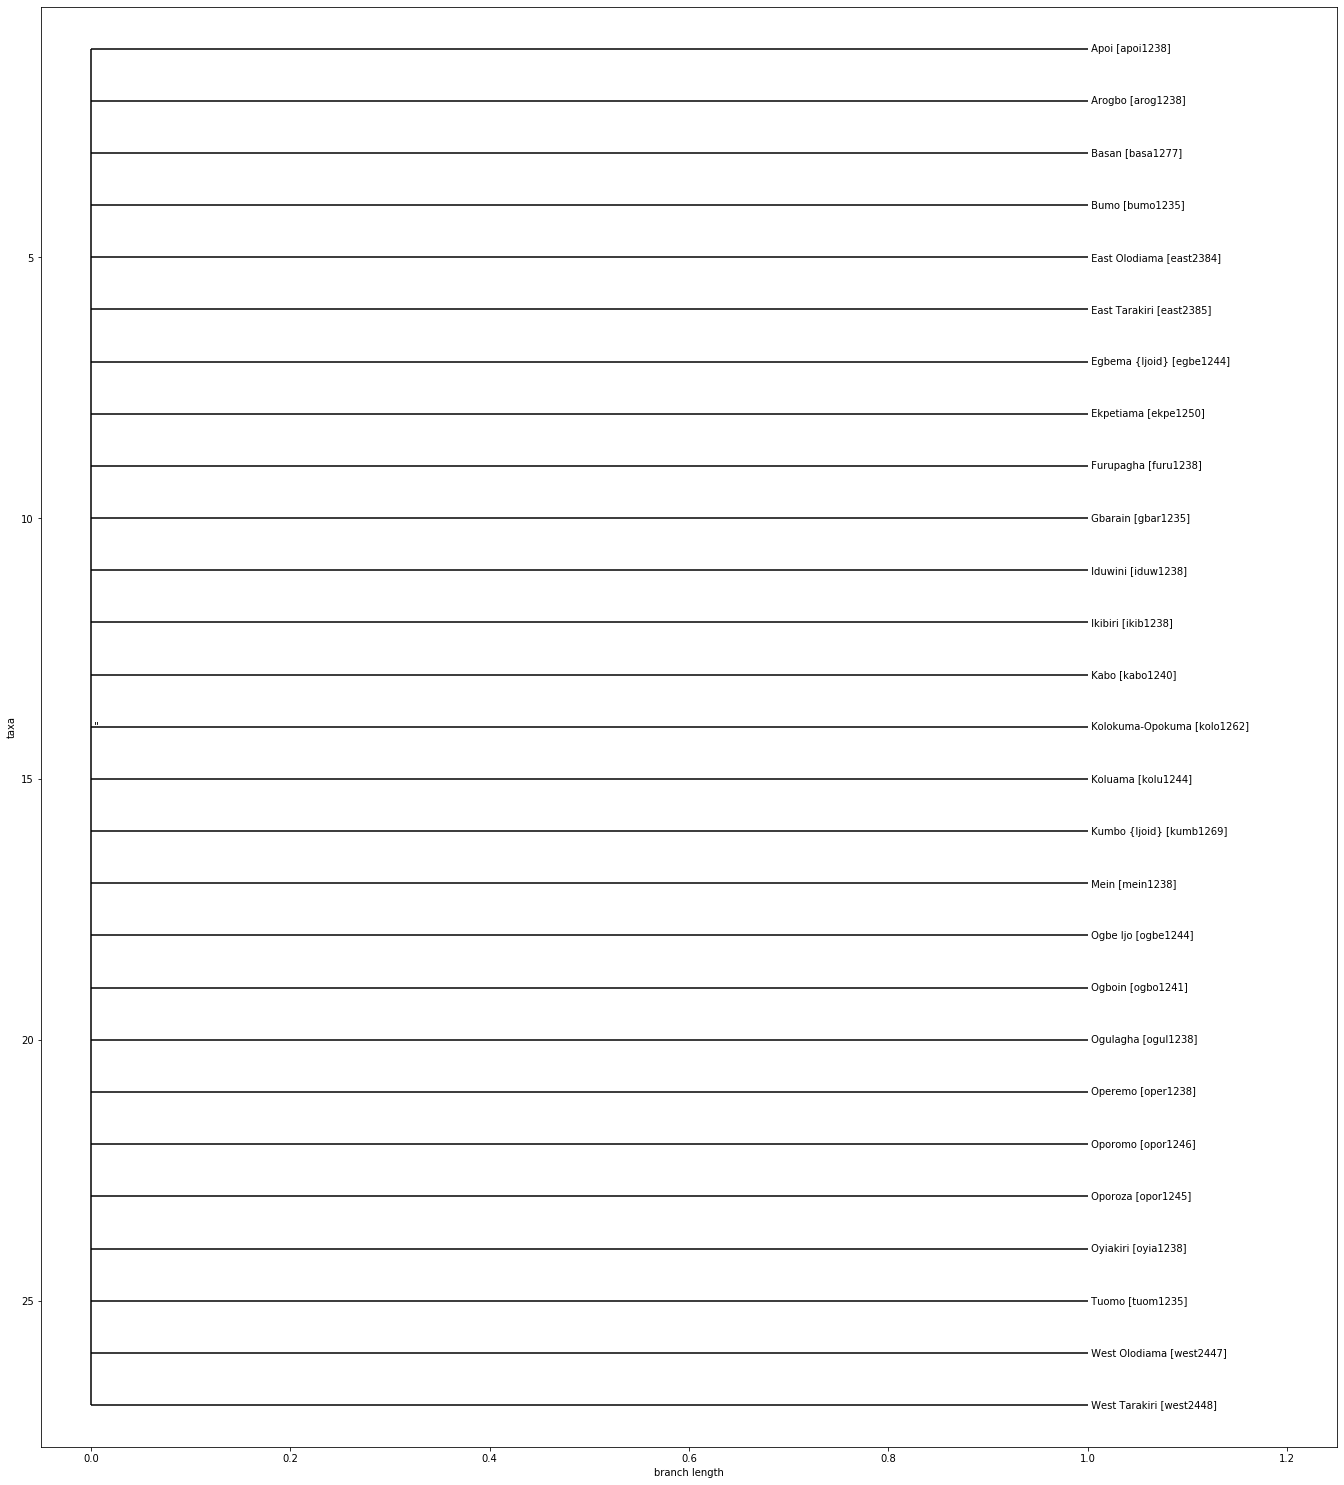

In [47]:
%matplotlib inline
left=3
bottom=5
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

for i in range(4,5):
    fil="./phylo_treeArea/"+area[i]+".dnd"
    print(fil)

pat="./phylo_treeArea/Africa.dnd"
tree = Phylo.read(pat, "newick")

tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

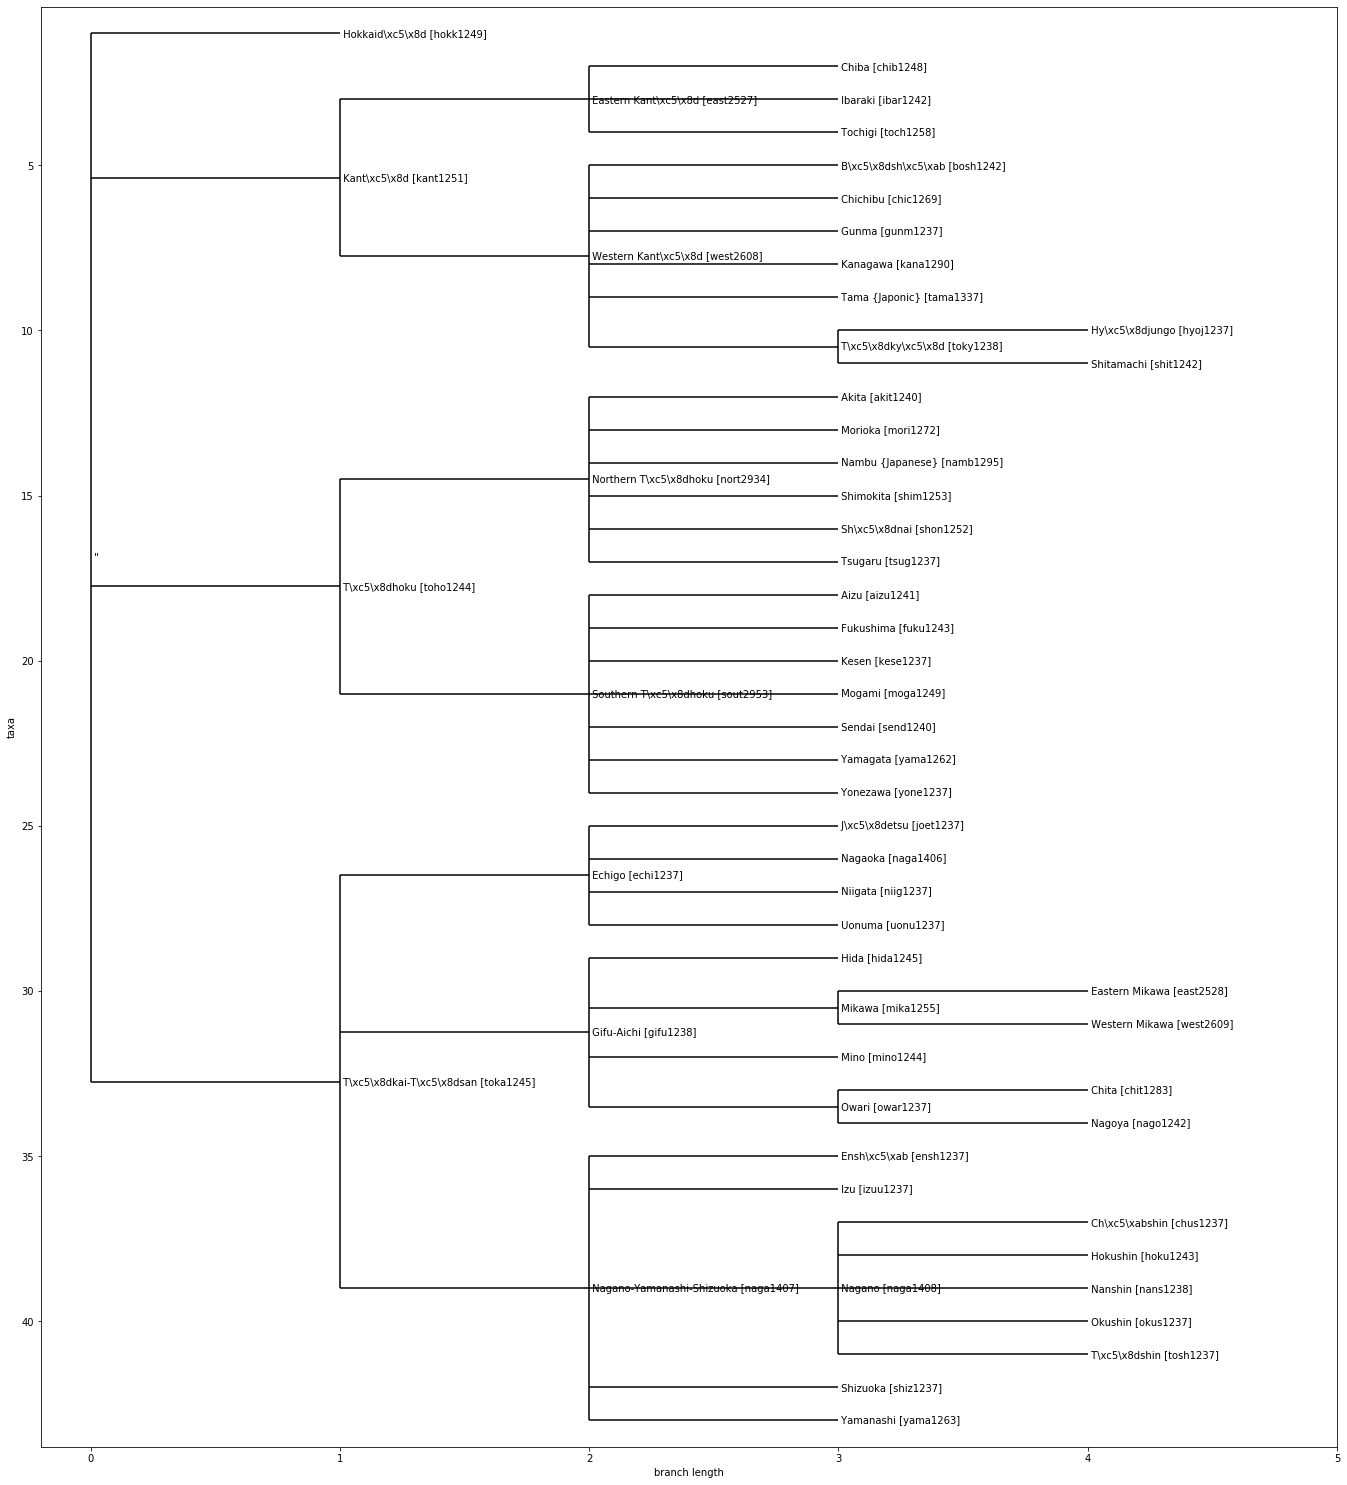

In [52]:
left=3
bottom=8
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')


fil="./Papunesia.dnd"

tree = Phylo.read(fil, "newick")


tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

we tried to represent it on a map 

In [30]:
import pandas as pd 
tree = pd.read_csv ("languoid.csv")
root0=['Assyrian Neo-Aramaic']
root1=['Central Group','Iranian Koine','Northern Group','Sapna cluster','Urmian group','Western Group']
root2=['Anhar','Mar Bishu','Nochiya','Tergawar','Baz','Dez','Gavar','Jilu','Qudshanis','Salamas','Upper Barwari','Van','Aradhin','Benatha','Daudiya','Inishke','Tina','Sipurghan','Solduz','Urmi','Lewin','Lower Barwari','Tal','Tkhuma' ]

In [31]:
def id(df,liste):
    """return the list of ID """
    l =  []
    for i in liste:
        k = 0
        for j in df["name"]:
            if i == j:
                l.append(k)
            k += 1
    return l 
        
gen0 = id(tree,root0)
lat0 = [tree["latitude"][i] for i in gen0]
lon0 = [tree["longitude"][i] for i in gen0]
tex0 = [tree["name"][i] for i in gen0]
stat0 = [tree["status"][i] for i in gen0]

gen1 = id(tree,root1)
lat1 = [tree["latitude"][i] for i in gen1]
lon1 = [tree["longitude"][i] for i in gen1]
tex1 = [tree["name"][i] for i in gen1]

gen2 = id(tree,root2)
lat2 = [tree["latitude"][i] for i in gen2]
lon2 = [tree["longitude"][i] for i in gen2]
tex2 = [tree["name"][i] for i in gen2]
stat2 = [tree["status"][i] for i in gen2]

However most of the languages did not have geographical data

Thus we decided to represent the one of the first generation which had geo data and the one of the last in order to see if it remained in the same geographical area

In [32]:
import plotly.express as px

fig = px.scatter_mapbox( lat= lat0, lon=lon0,hover_name=tex0,hover_data=[stat0],zoom = 0.5, height=500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
       
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [52]:
df.head()

newick
0                                'Aalawa [aala1237]'
1                            'Aantantara [aant1238]'
2  ('Aari [aari1239][aiw]-l-','Gayil [gayi1237][g...
3                          'Aari [aari1239][aiw]-l-'
4                        'Aariya [aari1240][aay]-l-'

In [33]:

import plotly.express as px

fig = px.scatter_mapbox( lat= lat2, lon=lon2,hover_name=tex2,hover_data=[stat2],zoom = 0.5, height=500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
       
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Now that we studied the biggest tree we tried to study the biggest tree of each macroarea

### we have the macroarea data on one file and the newick on the other so we will need to compute it 

In [15]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("languages-and-dialects-geo.csv")
df1 = pd.read_csv("languoid.csv")
df.head()

glottocode        name isocodes     level  macroarea  latitude  longitude
0   aala1237      Aalawa      NaN   dialect  Papunesia       NaN        NaN
1   aant1238  Aantantara      NaN   dialect  Papunesia       NaN        NaN
2   aari1239        Aari      aiw  language     Africa   5.95034    36.5721
3   aari1240      Aariya      aay  language    Eurasia       NaN        NaN
4   aasa1238       Aasax      aas  language     Africa  -4.00679    36.8648

In [16]:
print(len(df.columns))

7


In [17]:
k = 0
clean = []
for i in df["name"]:
    Exist = False
    for j in df1["name"] : 
        if i == j:
            Exist = True
            
    if Exist is False : 
        clean.append(k)
    k += 1

df.drop(clean,axis=0, inplace = True)
df.reset_index(drop = True, inplace = True)
print(len(df["name"]))

18974


In [18]:
k = 0
clean = []
for i in df1["name"]:
    Exist = False
    for j in df["name"] : 
        if i == j:
            Exist = True
            
    if Exist is False : 
        clean.append(k)
    k += 1

df1.drop(clean,axis=0, inplace = True)
df1.reset_index(drop = True, inplace = True)


In [20]:
len(df1["name"])

18974

In [21]:
df2 = pd.merge(df, df1, on='name', how='outer')
len(df2.columns)
df2.columns

Index(['glottocode', 'name', 'isocodes', 'level_x', 'macroarea', 'latitude_x',
       'longitude_x', 'bookkeeping', 'child_dialect_count',
       'child_family_count', 'child_language_count', 'description',
       'family_pk', 'father_pk', 'hid', 'id', 'jsondata', 'latitude_y',
       'level_y', 'longitude_y', 'markup_description', 'newick', 'pk',
       'status'],
      dtype='object')

In [22]:
scannedColumns =  ['name', 'macroarea', 'newick']
clean = []
for i in df2.columns:
    
    if i not in scannedColumns:
        clean.append(i)

df2.drop(clean,axis=1, inplace = True)
df2

name      macroarea  \
0          Aalawa      Papunesia   
1      Aantantara      Papunesia   
2            Aari         Africa   
3          Aariya        Eurasia   
4           Aasax         Africa   
...           ...            ...   
18969      Zutiua  South America   
18970     Zuwadza      Papunesia   
18971       Zwall         Africa   
18972       Zyphe        Eurasia   
18973     Zyuzdin        Eurasia   

                                                  newick  
0                                    'Aalawa [aala1237]'  
1                                'Aantantara [aant1238]'  
2                              'Aari [aari1239][aiw]-l-'  
3                            'Aariya [aari1240][aay]-l-'  
4                             'Aasax [aasa1238][aas]-l-'  
...                                                  ...  
18969                                'Zutiua [zuti1239]'  
18970                               'Zuwadza [zuwa1238]'  
18971                                 'Zwall [zwal1238]'  
18972  ('Lower Zyphe [lowe1400]','Upper Zyphe [uppe14...  
18973                               'Zyuzdin [zyud1238]'  

[18974 rows x 3 columns]

In [23]:
rowsToBeDeleted = []

for i in scannedColumns :
    k = 0
    for j in df2[i]:
        if j != j:
            rowsToBeDeleted.append(k)
        k += 1
rowsToBeDeleted = list(set(rowsToBeDeleted)) 
"""we convert the list in a set to delete every multiple occurences,
and then we convert it back to a list"""
df2.drop(rowsToBeDeleted ,axis=0, inplace = True)
df2.reset_index(drop = True, inplace = True)

In [28]:
area = []
for i in df2["macroarea"]:
    area.append(i)
area = list(set(area))
print(len(area))

6


In [25]:

treeByArea = [] #list of tuples, containg the rank of the tree and it's length 
for i in area:
    treeByArea.append((0,'j'))
k = 0
for i in df2["newick"]:
    if len(i)>len(treeByArea[area.index(df2["macroarea"][k])][1]):
        treeByArea[area.index(df2["macroarea"][k])]  = (k,i)
    k += 1
      

In [26]:
l = []
for i in treeByArea:
    l.append(i[1])

    


In [27]:
import copy
from io import StringIO
from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny
import matplotlib.pyplot as plt

for i in range(len(l)):
    path ="./phylo_treeArea/"+area[i]+".dnd"
    fichier = open(path, "w")
    fichier.write(str(l[i].encode('utf8')))
    fichier.close()

In [32]:
fil="./phylo_treeArea/Africa.dnd"

tree = Phylo.read(fil, "newick")


tree.rooted = True
Phylo.draw(tree,axes=ax)


tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128)
tree.root.color = "#808080"        # This is one alternative
tree.root.color = "gray"

Eurasia


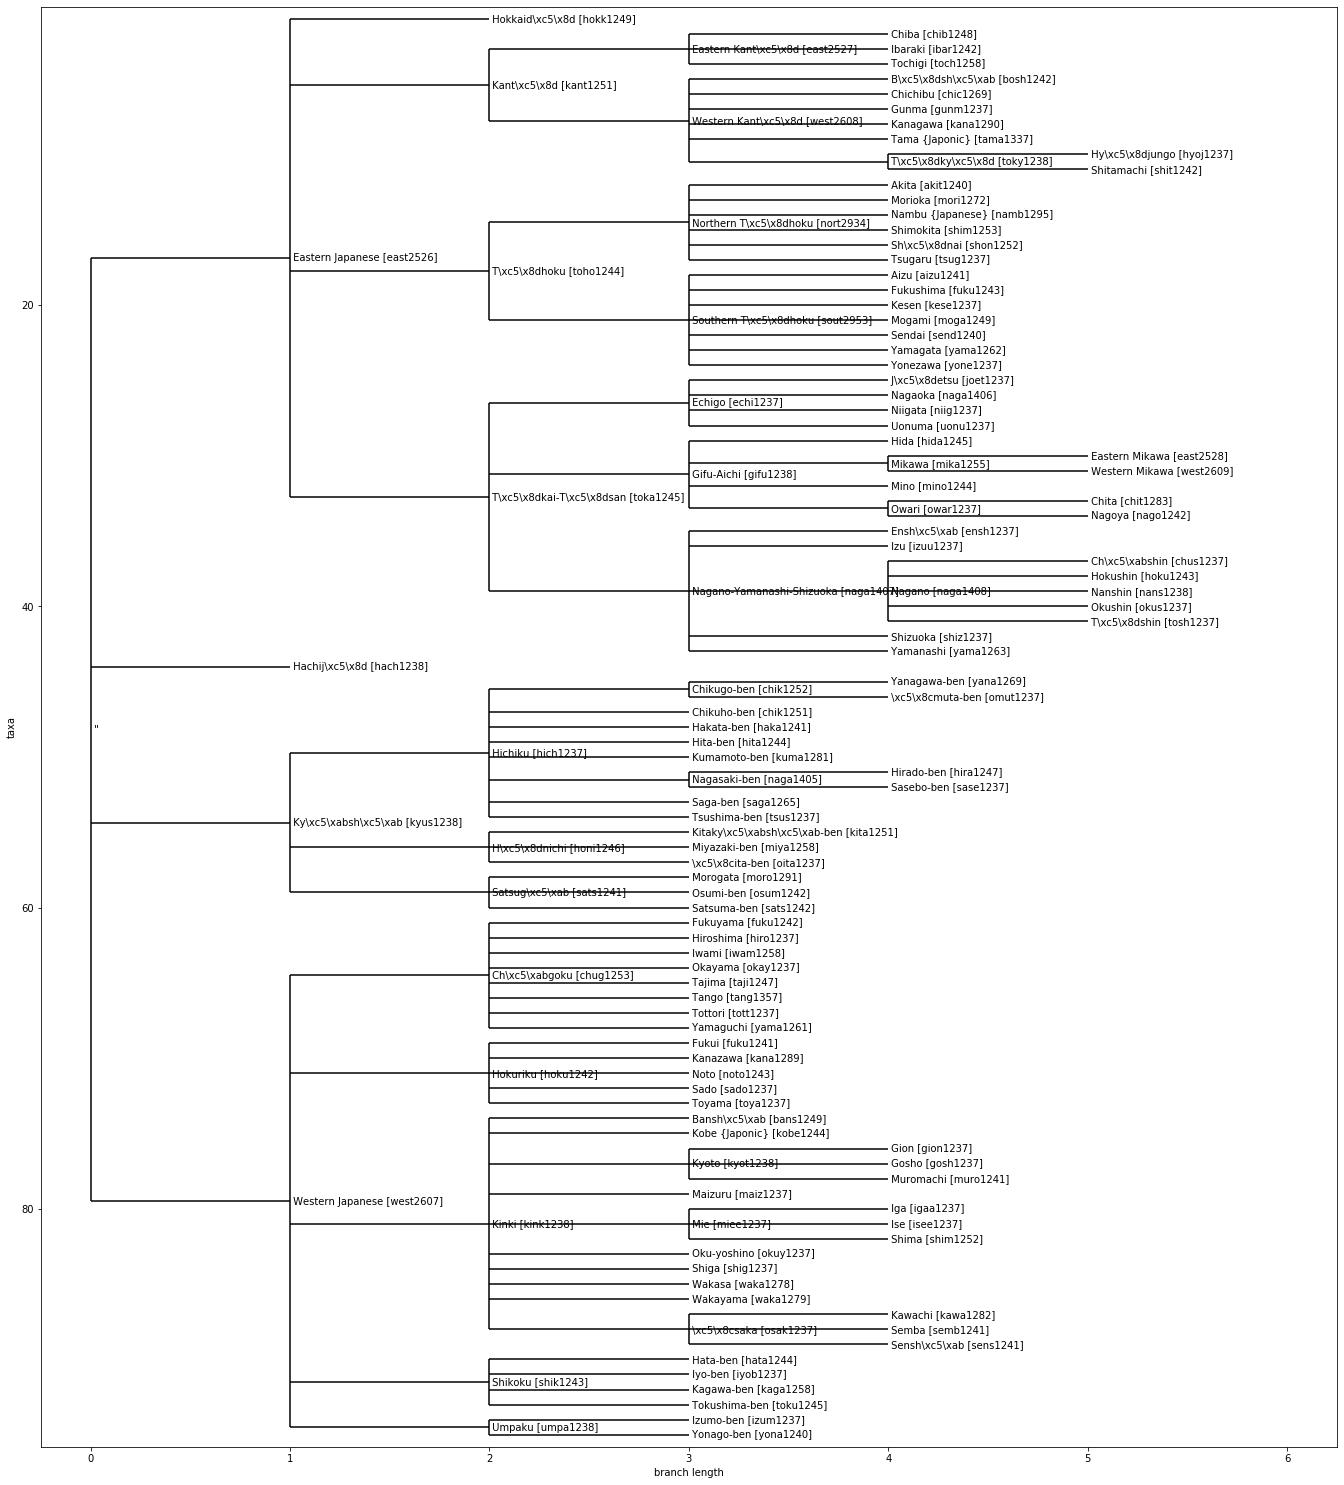

South America
North America
Australia
Africa
Papunesia


In [30]:
left=3
bottom=8
width=3
height=5
ax=plt.axes((left, bottom, width, height), facecolor='w')

for i in range(0,6):
    print(area[i])
    fil="./phylo_treeArea/"+area[i]+".dnd"

    tree = Phylo.read(fil, "newick")


    tree.rooted = True
    Phylo.draw(tree,axes=ax)


    tree = tree.as_phyloxml()
    tree = Phylogeny.from_tree(tree)
    tree.root.color = (128, 128, 128)
    tree.root.color = "#808080"        # This is one alternative
    tree.root.color = "gray"